In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stress/dataset/dataset description.pdf
/kaggle/input/stress/dataset/papers/Schmidt et al. - 2018 - Introducing WESAD.pdf
/kaggle/input/stress/dataset/papers/Koldijk et. al - 2018 - Detecting Work Stress.pdf
/kaggle/input/stress/dataset/papers/Koldijk et al. - 2014 - The SWELL dataset.pdf
/kaggle/input/stress/dataset/dataset/dataset description.pdf
/kaggle/input/stress/dataset/dataset/papers/Schmidt et al. - 2018 - Introducing WESAD.pdf
/kaggle/input/stress/dataset/dataset/papers/Koldijk et. al - 2018 - Detecting Work Stress.pdf
/kaggle/input/stress/dataset/dataset/papers/Koldijk et al. - 2014 - The SWELL dataset.pdf
/kaggle/input/stress/dataset/dataset/2. final/datasets/eda/wesad/unseen/classification/unseen-wesad-classification-eda-test-dataset.csv
/kaggle/input/stress/dataset/dataset/2. final/datasets/eda/wesad/unseen/classification/unseen-wesad-classification-eda-train-dataset.csv
/kaggle/input/stress/dataset/dataset/2. final/datasets/eda/wesad/unseen/classification/un

In [2]:
pip install mrmr_selection

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report
from scipy import signal
from sklearn import svm
from sklearn.datasets import make_classification
#The mRMR (Minimum Redundancy and Maximum Relevance) feature selection framework solves this problem by selecting the relevant
#features while controlling for the redundancy within the selected features.
import mrmr
from mrmr import mrmr_classif
import matplotlib.pyplot as plt
import pickle
import sklearn.metrics
import numpy as np
import pandas as pd
import random
import time

# Start the timer
start_time = time.time()

# Dataset : SWELL HRV 

In [4]:
#data source - https://www.kaggle.com/datasets/qiriro/stress
#loading swell dataset
swell = pd.read_csv("/kaggle/input/stress/dataset/2. final/datasets/hrv/swell/combined/classification/combined-swell-classification-hrv-dataset.csv")
swell

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,NasaTLX class,Condition Label,NasaTLX Label
0,1183.843150,1181.251800,365.254690,16.232314,16.228591,22.501702,58.411211,10.466667,1.400000,11.479176,...,0.139715,7.642723,2.419575e+06,1.233729,0.139544,2.164920,0.004441,high,2,2
1,1021.041857,1022.250750,100.521147,21.561202,21.561202,4.662131,59.350494,24.466667,2.000000,15.251160,...,0.144814,7.703927,-3.929102e+07,0.076401,0.032082,8.862171,0.002541,medium,0,1
2,820.137142,836.800665,107.879842,17.077352,17.076497,6.317130,74.687574,13.466667,0.600000,12.078936,...,0.632315,8.642197,-3.469434e+06,0.076524,0.037580,3.795796,0.013737,low,1,0
3,716.399934,745.647205,127.779239,15.836261,15.835732,8.068776,86.920960,10.466667,0.600000,11.201290,...,0.468034,9.323141,-3.132061e+06,0.190040,0.091586,1.152694,0.015717,low,0,0
4,977.406611,1041.002800,361.240628,14.531204,14.521966,24.859649,73.062657,7.000000,1.333333,10.272008,...,1.269579,8.547670,1.535559e+06,1.115494,0.159565,2.541186,0.005019,medium,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391633,790.421530,794.457970,50.172724,11.029840,11.028626,4.548817,76.233611,2.200000,0.266667,7.801019,...,1.023535,8.731186,3.411073e+06,0.185744,0.200779,2.994731,0.041512,medium,1,1
391634,819.584353,832.239875,141.689319,14.689652,14.689246,9.645519,75.479391,6.066667,1.466667,10.390332,...,0.165808,8.687888,-6.636711e+06,0.247628,0.093403,3.016309,0.004722,low,0,0
391635,809.148374,808.486885,63.859615,13.886357,13.886357,4.598731,74.621671,7.066667,0.000000,9.822414,...,0.092308,8.638384,2.099751e+08,0.075939,0.063121,4.801703,0.017767,low,1,0
391636,1001.883049,1033.107000,141.446770,17.956429,17.956289,7.877222,61.249311,14.466667,1.333333,12.701251,...,0.316769,7.826194,-1.299594e+07,0.166404,0.051054,12.142254,0.001985,low,1,0


In [5]:
#stressors: email interruptions (1) and time pressure (2)
#no stress:0
label1=pd.DataFrame(swell['Condition Label'].map({0: 0,1:1, 2: 1}))
label1

,Condition Label
0,1
1,0
2,1
3,0
4,1
...,...
391633,1
391634,0
391635,1
391636,1


In [6]:
# show all columns
swell.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'sampen', 'higuci', 'condition', 'subject_id', 'MEAN_RR_LOG',
       'MEAN_RR_SQRT', 'TP_SQRT', 'MEDIAN_REL_RR_LOG', 'RMSSD_REL_RR_LOG',
       'SDSD_REL_RR_LOG', 'VLF_LOG', 'LF_LOG', 'HF_LOG', 'TP_LOG', 'LF_HF_LOG',
       'RMSSD_LOG', 'SDRR_RMSSD_LOG', 'pNN25_LOG', 'pNN50_LOG', 'SD1_LOG',
       'KURT_YEO_JONSON', 'SKEW_YEO_JONSON', 'MEAN_REL_RR_YEO_JONSON',
       'SKEW_REL_RR_YEO_JONSON', 'LF_BOXCOX', 'HF_BOXCOX', 'SD1_BOXCOX',
       'KURT_SQUARE', 'HR_SQRT', 'MEAN_RR_MEAN_MEAN_REL_RR', 'SD2_LF', 'HR_LF',
       'HR_HF', 'HF_VLF', 'NasaTLX class', 'Condition Label', 'NasaTLX Label'],
      dtype='object')

In [7]:
# identify all unique subject id's in the SWELL data
subject_id=swell['subject_id']
# drop any columns that will not be used as input features to the model training/testing
swell=swell.drop(columns=['subject_id','sampen', 'higuci','condition', 'NasaTLX class', 'Condition Label', 'NasaTLX Label'])
# add back subject id's
swell['subject_id']=subject_id

In [8]:
# add back output column
swell_x = pd.concat([swell, label1], axis=1)
swell_x.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject_id,Condition Label
0,1183.843150,1181.251800,365.254690,16.232314,16.228591,22.501702,58.411211,10.466667,1.400000,11.479176,...,57.119810,0.139715,7.642723,2.419575e+06,1.233729,0.139544,2.164920,0.004441,24,1
1,1021.041857,1022.250750,100.521147,21.561202,21.561202,4.662131,59.350494,24.466667,2.000000,15.251160,...,7757.321073,0.144814,7.703927,-3.929102e+07,0.076401,0.032082,8.862171,0.002541,4,0
2,820.137142,836.800665,107.879842,17.077352,17.076497,6.317130,74.687574,13.466667,0.600000,12.078936,...,0.629808,0.632315,8.642197,-3.469434e+06,0.076524,0.037580,3.795796,0.013737,2,1
3,716.399934,745.647205,127.779239,15.836261,15.835732,8.068776,86.920960,10.466667,0.600000,11.201290,...,2.352294,0.468034,9.323141,-3.132061e+06,0.190040,0.091586,1.152694,0.015717,19,0
4,977.406611,1041.002800,361.240628,14.531204,14.521966,24.859649,73.062657,7.000000,1.333333,10.272008,...,2.467751,1.269579,8.547670,1.535559e+06,1.115494,0.159565,2.541186,0.005019,25,1


In [9]:
# show number of samples per user
subject_id.value_counts()

subject_id
16    21502
6     20888
19    19920
14    19680
10    19680
12    19680
4     19440
2     19395
1     19179
17    18824
18    18603
5     18050
7     17571
21    16679
24    16080
13    16080
3     16015
9     15942
22    15269
25    14915
20    14759
23    13487
Name: count, dtype: int64

# Dataset : WESAD Chest HRV 

In [10]:
#data source -https://www.kaggle.com/datasets/qiriro/stress
wesad = pd.read_csv("/kaggle/input/stress/dataset/2. final/datasets/hrv/wesad/combined/classification/wesad-chest-combined-classification-hrv.csv")
wesad

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,condition,SSSQ class,SSSQ Label,condition label
0,660.756625,657.242305,34.857082,7.408307,7.408129,4.705134,91.050077,1.75,0.00,5.244915,...,1.092856e+07,0.134410,0.249678,7.068440,0.033515,13,baseline,medium,1,0
1,762.004543,769.028815,106.035926,13.591780,13.580221,7.801475,80.267696,6.00,1.00,9.614723,...,-1.039564e+06,0.125816,0.067484,5.971604,0.003921,9,baseline,low,0,0
2,978.587122,973.028365,80.323113,20.318045,20.316451,3.953289,61.720802,20.50,1.50,14.383937,...,-3.073518e+06,0.069888,0.038281,10.945519,0.003154,4,amusement,medium,1,1
3,690.333891,669.548460,79.677822,15.173680,15.173087,5.251055,87.996270,8.75,1.50,10.742463,...,-4.341078e+06,0.094345,0.074014,2.435759,0.009692,8,stress,low,0,2
4,724.270331,721.597785,71.663062,13.580379,13.580370,5.276956,83.637107,5.00,0.75,9.614828,...,1.311140e+07,0.076385,0.063323,3.259253,0.014438,4,stress,medium,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135645,626.514447,611.246385,50.848737,5.969682,5.938417,8.517829,96.341521,0.00,0.00,4.204367,...,-7.113930e+05,0.271071,0.363785,24.633242,0.006019,5,stress,high,2,2
135646,628.974014,620.689235,64.127172,12.297019,12.293382,5.214855,96.344181,5.00,0.25,8.703647,...,1.184777e+06,0.057490,0.061358,3.873768,0.028697,13,stress,medium,1,2
135647,589.926708,581.814135,51.445399,11.549705,11.541521,4.454261,102.423931,3.25,0.25,8.171334,...,-8.792667e+05,0.107559,0.152385,2.082405,0.121886,10,stress,low,0,2
135648,924.373882,930.926635,88.692462,11.467998,11.467912,7.733910,65.529308,5.50,0.00,8.119220,...,-8.005780e+06,0.333801,0.174757,6.849003,0.002597,5,baseline,high,2,0


In [11]:

# show WESAD columns
wesad.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'MEAN_RR_LOG', 'MEAN_RR_SQRT', 'TP_SQRT', 'MEDIAN_REL_RR_LOG',
       'RMSSD_REL_RR_LOG', 'SDSD_REL_RR_LOG', 'VLF_LOG', 'LF_LOG', 'HF_LOG',
       'TP_LOG', 'LF_HF_LOG', 'RMSSD_LOG', 'SDRR_RMSSD_LOG', 'pNN25_LOG',
       'pNN50_LOG', 'SD1_LOG', 'KURT_YEO_JONSON', 'SKEW_YEO_JONSON',
       'MEAN_REL_RR_YEO_JONSON', 'SKEW_REL_RR_YEO_JONSON', 'LF_BOXCOX',
       'HF_BOXCOX', 'SD1_BOXCOX', 'KURT_SQUARE', 'HR_SQRT',
       'MEAN_RR_MEAN_MEAN_REL_RR', 'SD2_LF', 'HR_LF', 'HR_HF', 'HF_VLF',
       'subject id', 'condition', 'SSSQ class', 'SSSQ Label',
       'condition label'],
      dtype='object')

In [12]:
# map subjects to respective id's
subject_id=pd.DataFrame(wesad['subject id'].map({2: 26,3:27, 4: 28,5: 29,6:30, 7: 31,8: 32,9:33, 10: 34,11: 35,13:36, 14: 37,15: 38,16:39, 17: 40}))
subject_id

,subject id
0,36
1,33
2,28
3,32
4,28
...,...
135645,29
135646,36
135647,34
135648,29


In [13]:
# make name the same for output columns
wesad=wesad.rename(columns={"condition label":"Condition Label"})
wesad.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'MEAN_RR_LOG', 'MEAN_RR_SQRT', 'TP_SQRT', 'MEDIAN_REL_RR_LOG',
       'RMSSD_REL_RR_LOG', 'SDSD_REL_RR_LOG', 'VLF_LOG', 'LF_LOG', 'HF_LOG',
       'TP_LOG', 'LF_HF_LOG', 'RMSSD_LOG', 'SDRR_RMSSD_LOG', 'pNN25_LOG',
       'pNN50_LOG', 'SD1_LOG', 'KURT_YEO_JONSON', 'SKEW_YEO_JONSON',
       'MEAN_REL_RR_YEO_JONSON', 'SKEW_REL_RR_YEO_JONSON', 'LF_BOXCOX',
       'HF_BOXCOX', 'SD1_BOXCOX', 'KURT_SQUARE', 'HR_SQRT',
       'MEAN_RR_MEAN_MEAN_REL_RR', 'SD2_LF', 'HR_LF', 'HR_HF', 'HF_VLF',
       'subject id', 'condition', 'SSSQ class', 'SSSQ Label',
       'Condition Label'],
      dtype='object')

In [14]:
# split WESAD data into predictors and response variables
X_wesad=wesad.iloc[:,0:-5]
y_wesad=wesad['Condition Label']

In [15]:
# add back subject id information
X_wesad['subject_id']=subject_id
X_wesad

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF_BOXCOX,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject_id
0,660.756625,657.242305,34.857082,7.408307,7.408129,4.705134,91.050077,1.75,0.00,5.244915,...,4.289257,2.184257,4.784952,9.542016,1.092856e+07,0.134410,0.249678,7.068440,0.033515,36
1,762.004543,769.028815,106.035926,13.591780,13.580221,7.801475,80.267696,6.00,1.00,9.614723,...,2.969491,12.244642,0.698604,8.959224,-1.039564e+06,0.125816,0.067484,5.971604,0.003921,33
2,978.587122,973.028365,80.323113,20.318045,20.316451,3.953289,61.720802,20.50,1.50,14.383937,...,1.990193,23.732955,0.091510,7.856259,-3.073518e+06,0.069888,0.038281,10.945519,0.003154,28
3,690.333891,669.548460,79.677822,15.173680,15.173087,5.251055,87.996270,8.75,1.50,10.742463,...,8.200294,1.705186,0.037746,9.380633,-4.341078e+06,0.094345,0.074014,2.435759,0.009692,32
4,724.270331,721.597785,71.663062,13.580379,13.580370,5.276956,83.637107,5.00,0.75,9.614828,...,4.243693,13.758863,0.001501,9.145333,1.311140e+07,0.076385,0.063323,3.259253,0.014438,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135645,626.514447,611.246385,50.848737,5.969682,5.938417,8.517829,96.341521,0.00,0.00,4.204367,...,1.522743,0.735339,8.048406,9.815372,-7.113930e+05,0.271071,0.363785,24.633242,0.006019,29
135646,628.974014,620.689235,64.127172,12.297019,12.293382,5.214855,96.344181,5.00,0.25,8.703647,...,6.237187,3.117222,0.099832,9.815507,1.184777e+06,0.057490,0.061358,3.873768,0.028697,36
135647,589.926708,581.814135,51.445399,11.549705,11.541521,4.454261,102.423931,3.25,0.25,8.171334,...,6.535686,8.960535,6.980853,10.120471,-8.792667e+05,0.107559,0.152385,2.082405,0.121886,34
135648,924.373882,930.926635,88.692462,11.467998,11.467912,7.733910,65.529308,5.50,0.00,8.119220,...,2.716431,0.837748,0.199777,8.095017,-8.005780e+06,0.333801,0.174757,6.849003,0.002597,29


In [16]:
#Notation: 0-baseline; 1-amusement; 2-stress)
label2=pd.DataFrame(y_wesad.map({1: 0,0:0, 2: 1}))
label2

,Condition Label
0,0
1,0
2,0
3,1
4,1
...,...
135645,1
135646,1
135647,1
135648,0


In [17]:
# add back condition labels
X_wesad = pd.concat([X_wesad, label2], axis=1)
X_wesad.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject_id,Condition Label
0,660.756625,657.242305,34.857082,7.408307,7.408129,4.705134,91.050077,1.75,0.00,5.244915,...,2.184257,4.784952,9.542016,1.092856e+07,0.134410,0.249678,7.068440,0.033515,36,0
1,762.004543,769.028815,106.035926,13.591780,13.580221,7.801475,80.267696,6.00,1.00,9.614723,...,12.244642,0.698604,8.959224,-1.039564e+06,0.125816,0.067484,5.971604,0.003921,33,0
2,978.587122,973.028365,80.323113,20.318045,20.316451,3.953289,61.720802,20.50,1.50,14.383937,...,23.732955,0.091510,7.856259,-3.073518e+06,0.069888,0.038281,10.945519,0.003154,28,0
3,690.333891,669.548460,79.677822,15.173680,15.173087,5.251055,87.996270,8.75,1.50,10.742463,...,1.705186,0.037746,9.380633,-4.341078e+06,0.094345,0.074014,2.435759,0.009692,32,1
4,724.270331,721.597785,71.663062,13.580379,13.580370,5.276956,83.637107,5.00,0.75,9.614828,...,13.758863,0.001501,9.145333,1.311140e+07,0.076385,0.063323,3.259253,0.014438,28,1


In [18]:
#combining both datasets and shuffle
dfs = [X_wesad, swell_x]
random.shuffle(dfs)
dfs=pd.concat(dfs, axis=0)
dfs

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject_id,Condition Label
0,1183.843150,1181.251800,365.254690,16.232314,16.228591,22.501702,58.411211,10.466667,1.400000,11.479176,...,57.119810,0.139715,7.642723,2.419575e+06,1.233729,0.139544,2.164920,0.004441,24,1
1,1021.041857,1022.250750,100.521147,21.561202,21.561202,4.662131,59.350494,24.466667,2.000000,15.251160,...,7757.321073,0.144814,7.703927,-3.929102e+07,0.076401,0.032082,8.862171,0.002541,4,0
2,820.137142,836.800665,107.879842,17.077352,17.076497,6.317130,74.687574,13.466667,0.600000,12.078936,...,0.629808,0.632315,8.642197,-3.469434e+06,0.076524,0.037580,3.795796,0.013737,2,1
3,716.399934,745.647205,127.779239,15.836261,15.835732,8.068776,86.920960,10.466667,0.600000,11.201290,...,2.352294,0.468034,9.323141,-3.132061e+06,0.190040,0.091586,1.152694,0.015717,19,0
4,977.406611,1041.002800,361.240628,14.531204,14.521966,24.859649,73.062657,7.000000,1.333333,10.272008,...,2.467751,1.269579,8.547670,1.535559e+06,1.115494,0.159565,2.541186,0.005019,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135645,626.514447,611.246385,50.848737,5.969682,5.938417,8.517829,96.341521,0.000000,0.000000,4.204367,...,0.735339,8.048406,9.815372,-7.113930e+05,0.271071,0.363785,24.633242,0.006019,29,1
135646,628.974014,620.689235,64.127172,12.297019,12.293382,5.214855,96.344181,5.000000,0.250000,8.703647,...,3.117222,0.099832,9.815507,1.184777e+06,0.057490,0.061358,3.873768,0.028697,36,1
135647,589.926708,581.814135,51.445399,11.549705,11.541521,4.454261,102.423931,3.250000,0.250000,8.171334,...,8.960535,6.980853,10.120471,-8.792667e+05,0.107559,0.152385,2.082405,0.121886,34,1
135648,924.373882,930.926635,88.692462,11.467998,11.467912,7.733910,65.529308,5.500000,0.000000,8.119220,...,0.837748,0.199777,8.095017,-8.005780e+06,0.333801,0.174757,6.849003,0.002597,29,0


In [19]:
# show number of instances per subject
dfs['subject_id'].value_counts()

subject_id
16    21502
6     20888
19    19920
14    19680
10    19680
12    19680
4     19440
2     19395
1     19179
17    18824
18    18603
5     18050
7     17571
21    16679
24    16080
13    16080
3     16015
9     15942
22    15269
25    14915
20    14759
23    13487
34     9352
40     9350
38     9150
35     9139
36     9135
39     9096
37     9041
29     9005
32     8997
30     8981
31     8970
28     8956
33     8921
27     8868
26     8689
Name: count, dtype: int64

Running full feature range experiment...


100%|██████████| 60/60 [00:20<00:00,  2.89it/s]


Running limited feature range experiment...


100%|██████████| 15/15 [00:07<00:00,  1.97it/s]


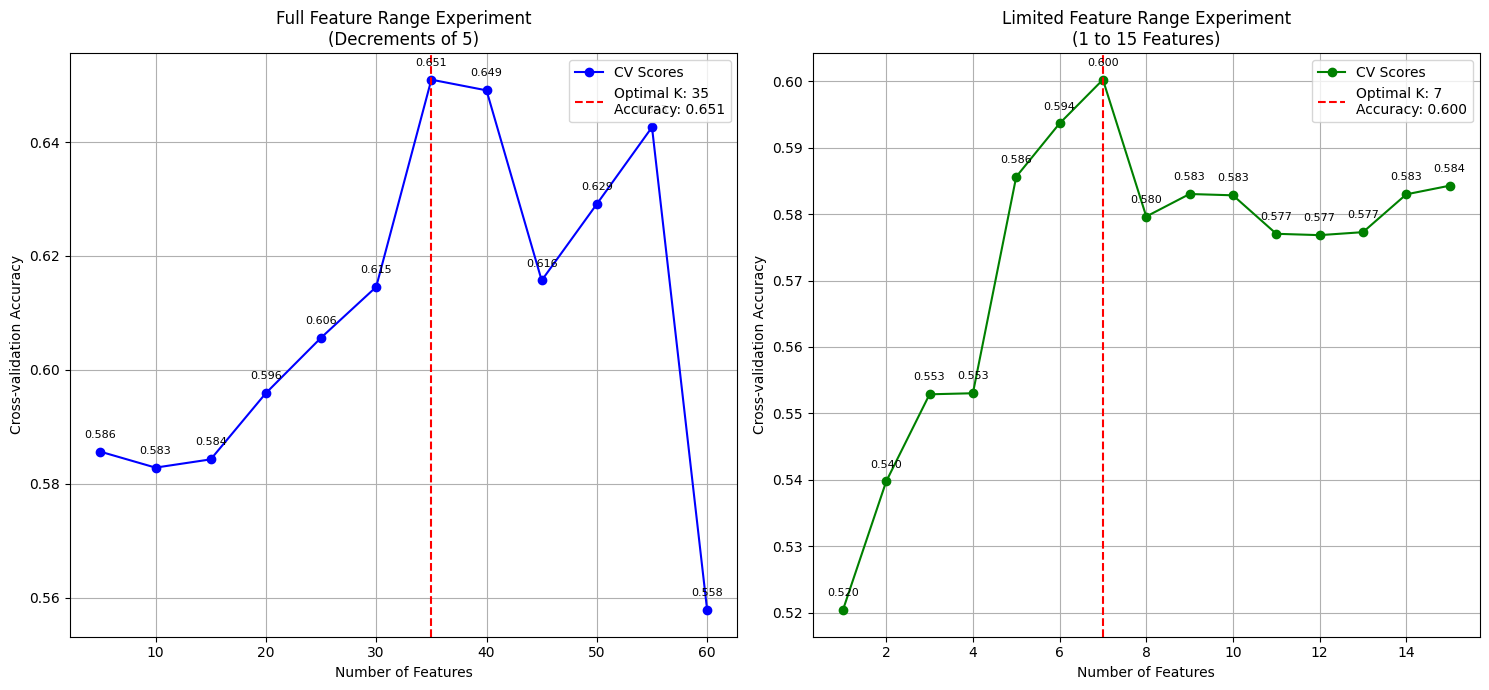


Full Feature Range Experiment:
Optimal number of features: 35
Best cross-validation accuracy: 0.651

Limited Feature Range Experiment (1-15):
Optimal number of features: 7
Best cross-validation accuracy: 0.600

Using results from full feature range experiment


100%|██████████| 35/35 [00:15<00:00,  2.29it/s]


Selected features:
1. KURT
2. VLF
3. MEAN_REL_RR
4. HR_HF
5. pNN25
6. KURT_REL_RR
7. TP
8. MEDIAN_REL_RR_LOG
9. KURT_YEO_JONSON
10. pNN25_LOG
11. MEDIAN_REL_RR
12. KURT_SQUARE
13. TP_SQRT
14. SDSD_REL_RR
15. MEAN_REL_RR_YEO_JONSON
16. LF_HF_LOG
17. SD2
18. LF
19. SDRR
20. RMSSD_REL_RR
21. SDSD
22. RMSSD
23. SD1
24. SDSD_REL_RR_LOG
25. RMSSD_REL_RR_LOG
26. SD1_LOG
27. LF_NU
28. RMSSD_LOG
29. SDRR_REL_RR
30. HF_NU
31. LF_LOG
32. MEDIAN_RR
33. HF_VLF
34. MEAN_RR
35. LF_PCT


In [21]:

import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = dfs
# Define the group column (subject IDs)
group_col = 'subject_id'
# Define the test size (30%)
test_size = 0.3
# Initialize empty lists to store the training and test data
X_train = []
X_test = []
y_train = []
y_test = []
# Split the data by subject ID and combine the training data
for group_id, group_data in df.groupby(group_col):
    # Split the group data into training and test sets
    X_group_train, X_group_test, y_group_train, y_group_test = train_test_split(
        group_data.iloc[:, :-2],  # features only
        group_data.iloc[:, -1],   # label only
        test_size=test_size,      # test size ~= 30%
        random_state=123,stratify=group_data.iloc[:, -1] # for reproducibility
    )
    # Append the training and test data to the respective lists
    X_train.append(X_group_train)
    X_test.append(X_group_test)
    y_train.append(y_group_train)
    y_test.append(y_group_test)



# # PART BELOW ADDED ON 16 JAN 1038AM TO SELECT NUMBER OF FEATURES - 2 EXPTS: ALL FEATURES & LIMITED NO. 
# #####################################################################################################
# Concatenate the lists into DataFrames
X_train = pd.concat(X_train, axis=0)
y_train = pd.concat(y_train, axis=0)

def experiment_with_features(X_train, y_train, experiment_type="full"):
    """
    Run feature selection experiments
    experiment_type: "full" for total features or "limited" for 15 features
    """
    if experiment_type == "full":
        max_features = len(X_train.columns)
        k_values = list(range(5, max_features + 1, 5))
    else:
        k_values = list(range(1, 16))  # 1 to 15
        
    cv_scores = []
    
    for k in k_values:
        selected = mrmr_classif(X=X_train, y=y_train, K=k)
        X_selected = X_train[selected]
        score = cross_val_score(RandomForestClassifier(random_state=123), 
                              X_selected, y_train, cv=5).mean()
        cv_scores.append(score)
    
    return k_values, cv_scores

def plot_experiments(full_k_values, full_scores, limited_k_values, limited_scores):
    """Plot results from both experiments"""
    plt.figure(figsize=(15, 7))
    
    # Plot both experiments
    plt.subplot(1, 2, 1)
    plt.plot(full_k_values, full_scores, 'bo-', label='CV Scores')
    optimal_k_full = full_k_values[np.argmax(full_scores)]
    max_score_full = max(full_scores)
    plt.axvline(x=optimal_k_full, color='r', linestyle='--',
                label=f'Optimal K: {optimal_k_full}\nAccuracy: {max_score_full:.3f}')
    
    plt.xlabel('Number of Features')
    plt.ylabel('Cross-validation Accuracy')
    plt.title('Full Feature Range Experiment\n(Decrements of 5)')
    plt.grid(True)
    plt.legend()
    
    # Add value labels for full experiment
    for i, score in enumerate(full_scores):
        plt.annotate(f'{score:.3f}',
                    (full_k_values[i], full_scores[i]),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontsize=8)
    
    plt.subplot(1, 2, 2)
    plt.plot(limited_k_values, limited_scores, 'go-', label='CV Scores')
    optimal_k_limited = limited_k_values[np.argmax(limited_scores)]
    max_score_limited = max(limited_scores)
    plt.axvline(x=optimal_k_limited, color='r', linestyle='--',
                label=f'Optimal K: {optimal_k_limited}\nAccuracy: {max_score_limited:.3f}')
    
    plt.xlabel('Number of Features')
    plt.ylabel('Cross-validation Accuracy')
    plt.title('Limited Feature Range Experiment\n(1 to 15 Features)')
    plt.grid(True)
    plt.legend()
    
    # Add value labels for limited experiment
    for i, score in enumerate(limited_scores):
        plt.annotate(f'{score:.3f}',
                    (limited_k_values[i], limited_scores[i]),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    return optimal_k_full, max_score_full, optimal_k_limited, max_score_limited

# Run both experiments
print("Running full feature range experiment...")
full_k_values, full_scores = experiment_with_features(X_train, y_train, "full")

print("Running limited feature range experiment...")
limited_k_values, limited_scores = experiment_with_features(X_train, y_train, "limited")

# Plot results
optimal_k_full, max_score_full, optimal_k_limited, max_score_limited = plot_experiments(
    full_k_values, full_scores, limited_k_values, limited_scores
)

# Print results
print("\nFull Feature Range Experiment:")
print(f"Optimal number of features: {optimal_k_full}")
print(f"Best cross-validation accuracy: {max_score_full:.3f}")

print("\nLimited Feature Range Experiment (1-15):")
print(f"Optimal number of features: {optimal_k_limited}")
print(f"Best cross-validation accuracy: {max_score_limited:.3f}")

# Get selected features for the better performing experiment
if max_score_full > max_score_limited:
    optimal_k = optimal_k_full
    print("\nUsing results from full feature range experiment")
else:
    optimal_k = optimal_k_limited
    print("\nUsing results from limited feature range experiment")

final_selected_features = mrmr_classif(X=X_train, y=y_train, K=optimal_k)
print("\nSelected features:")
for i, feature in enumerate(final_selected_features, 1):
    print(f"{i}. {feature}")


# #####################################################################################################

# # # PART BELOW ADDED ON 14 JAN 116PM TO SELECT NUMBER OF FEATURES
# # #####################################################################################################
# # Concatenate the lists into DataFrames
# X_train = pd.concat(X_train, axis=0)
# y_train = pd.concat(y_train, axis=0)

# def find_optimal_k(X_train, y_train, max_k=None):
#     if max_k is None:
#         max_k = len(X_train.columns)
    
#     # Cross-validation scores
#     k_values = range(5, max_k, 5)
#     cv_scores = []
    
#     for k in k_values:
#         selected = mrmr_classif(X=X_train, y=y_train, K=k)
#         X_selected = X_train[selected]
#         score = cross_val_score(RandomForestClassifier(), X_selected, y_train, cv=5).mean()
#         cv_scores.append(score)
    
#     # Find elbow point
#     differences = np.diff(cv_scores)
#     elbow_k = k_values[np.argmin(differences < np.mean(differences))]
    
#     # Information criterion
#     mi_scores = mutual_info_classif(X_train, y_train)
#     sorted_scores = np.sort(mi_scores)[::-1]
#     info_k = np.argmin(np.diff(sorted_scores) < np.mean(np.diff(sorted_scores))) + 1
    
#     # Combine recommendations
#     recommended_k = int(np.mean([elbow_k, info_k]))
    
#     return recommended_k, elbow_k, info_k

# # Usage
# recommended_k, elbow_k, info_k = find_optimal_k(X_train, y_train)
# print(f"Recommended K: {recommended_k}")
# print(f"Elbow method K: {elbow_k}")
# print(f"Information criterion K: {info_k}")

# def plot_feature_selection_metrics(X_train, y_train, max_k=None):
#     if max_k is None:
#         max_k = len(X_train.columns)
    
#     k_values = range(5, max_k, 5)
#     cv_scores = []
    
#     for k in k_values:
#         selected = mrmr_classif(X=X_train, y=y_train, K=k)
#         X_selected = X_train[selected]
#         score = cross_val_score(RandomForestClassifier(), X_selected, y_train, cv=5).mean()
#         cv_scores.append(score)
    
#     plt.figure(figsize=(10, 6))
#     plt.plot(k_values, cv_scores, 'b-', label='CV Scores')
#     plt.axvline(x=recommended_k, color='r', linestyle='--', label='Recommended K')
#     plt.xlabel('Number of Features (K)')
#     plt.ylabel('Cross-validation Score')
#     plt.title('Feature Selection Performance')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Plot the results
# plot_feature_selection_metrics(X_train_combined, y_train_combined)


# #####################################################################################################



# # PART BELOW IS FOR TRAINNG MODELS AND SELECTING THE BEST MODEL

# #####################################################################################################

# # Combine the training data from all subjects
# X_train = pd.concat(X_train)
# y_train = pd.concat(y_train)
# # select top 8 features using mRMR
# selected_features = mrmr_classif(X=X_train, y=y_train, K=8)
# print(selected_features)
# x_train=X_train[selected_features]


# # Define the k-fold cross-validation object
# kfold = StratifiedKFold(n_splits=15, shuffle=True,random_state=123)
# best_model = None
# best_score = 0
# # Train the model using k-fold cross-validation
# model = GradientBoostingClassifier(max_depth=20, min_samples_split=2, n_estimators=100)
# # Train and validate the model using k-fold cross-validation
# for train_index, val_index in kfold.split(x_train,y_train):
#     X_train_kf, X_val = np.array(x_train)[train_index], np.array(x_train)[val_index]
#     y_train_kf, y_val = np.array(y_train)[train_index], np.array(y_train)[val_index]
#     # Fit the model on the training set and the validation set
#     model.fit(X_train_kf, y_train_kf)
#     # Compute the score on the validation set
#     y_pred_val = model.predict(X_val)
#     val_score = accuracy_score(y_val, y_pred_val)
#     print(f"Validation score: {val_score:.4f}")
#     # Save the model if it is the best one so far
#     if val_score > best_score:
#         best_score = val_score
#         best_model = model

# #####################################################################################################

# # CODE BLOCK BELOW IS PRINTING CLASSIFICATION REPORT FOR EACH SUBJECT INDIVIDUALLY

# # Iterate over the test data for each subject and evaluate the model
# for i in range(len(X_test)):
#     # Evaluate the model on the test data for the i-th subject
#     y_pred = best_model.predict(X_test[i][selected_features])
#     test_score = accuracy_score(y_test[i], y_pred)
#     print(f"Test score for subject {i+1}: {test_score:.4f}")
#     # Compute the precision, recall, and F1 score for each class
#     report = classification_report(y_test[i], y_pred)
#     print(f"Classification report for subject {i+1}:\n{report}\n")
# # End the timer
# end_time = time.time()
# # Calculate the computational time
# computational_time = end_time - start_time
# print("Computational time:", computational_time)

# #####################################################################################################


In [22]:
print("\nLimited Range Selected Features (K={}):" .format(optimal_k_limited))
limited_selected_features = mrmr_classif(X=X_train, y=y_train, K=optimal_k_limited)
for i, feature in enumerate(limited_selected_features, 1):
    print(f"{i}. {feature}")


Limited Range Selected Features (K=7):


100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

1. KURT
2. VLF
3. MEAN_REL_RR
4. HR_HF
5. pNN25
6. KURT_REL_RR
7. TP


# Block below is only for first time execution (now the best model is already saved and being loaded in the following code block)

In [ ]:
# # print("Computational time:", computational_time)

# # Save the best model and selected features
# import joblib
# import pickle

# # Save the model using joblib (better for large NumPy arrays and scikit-learn models)
# joblib.dump(best_model, 'best_model.joblib')

# # Save the selected features using pickle
# with open('selected_features.pkl', 'wb') as f:
#     pickle.dump(selected_features, f)

# print("Model and features saved successfully!")

# LOAD THE MODEL AND PERFORM PREDICTIONS

In [ ]:

import joblib
import pickle
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Load the saved model and features
model_path = '/kaggle/input/wesad-swell-binary-stress-best-model/WESAD_SWELL_BINARY_BEST_MODEL/best_model.joblib'
features_path = '/kaggle/input/wesad-swell-binary-stress-best-model/WESAD_SWELL_BINARY_BEST_MODEL/selected_features.pkl'

loaded_model = joblib.load(model_path)
with open(features_path, 'rb') as f:
    selected_features = pickle.load(f)

# Initialize lists for all predictions and true labels
all_predictions = []
all_true_labels = []

# Make predictions for each test subject and collect results
for i in range(len(X_test)):
    # Get predictions for current subject using selected features
    y_pred = loaded_model.predict(X_test[i][selected_features])
    
    # Collect predictions and true labels
    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test[i])

# Convert lists to numpy arrays
all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)


# Print sample counts
print(f"\nTotal number of test samples: {len(all_true_labels)}")
print(f"\nTotal number of predictions: {len(all_predictions)}")
# for i in range(len(X_test)):
#     print(f"Subject {i+1} test samples: {len(X_test[i])}")
    
# Calculate and print overall accuracy
overall_accuracy = accuracy_score(all_true_labels, all_predictions)
print(f"\nOverall Test Accuracy: {overall_accuracy:.4f}")

# Generate and print consolidated classification report
consolidated_report = classification_report(all_true_labels, all_predictions)
print(f"\nConsolidated Classification Report:\n{consolidated_report}")

# Calculate computational time
# end_time = time.time()
# computational_time = end_time - start_time
# print(f"\nComputational time: {computational_time:.2f} seconds")